<a href="https://colab.research.google.com/github/sujitbehera27/GenAI/blob/main/WorkingGAN1_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2/2 [==============================] - 0s 9ms/step
Epoch 0, D Loss: 0.5317420959472656, D Accuracy: 0.0, G Loss: 1.8370188474655151
2/2 [==============================] - 0s 4ms/step
Epoch 100, D Loss: -0.03275685757398605, D Accuracy: 0.0, G Loss: 8.601800918579102
2/2 [==============================] - 0s 7ms/step
Epoch 200, D Loss: 0.06438585370779037, D Accuracy: 0.0, G Loss: 5.06402587890625
2/2 [==============================] - 0s 5ms/step
Epoch 300, D Loss: 0.16714026033878326, D Accuracy: 0.0, G Loss: 2.79951548576355
2/2 [==============================] - 0s 8ms/step
Epoch 400, D Loss: 0.11835756152868271, D Accuracy: 0.0, G Loss: 2.755019187927246
2/2 [==============================] - 0s 8ms/step
Epoch 500, D Loss: 0.12318648397922516, D Accuracy: 0.0, G Loss: 2.7170610427856445
2/2 [==============================] - 0s 8ms/step
Epoch 600, D Loss: 0.18872517347335815, D Accuracy: 0.0, G Loss: 1.9862810373306274
2/2 [==============================] - 0s 4ms/step
Epoch 700, D

<ipython-input-14-3517aa132875>:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 1))


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
Epoch 5100, D Loss: 0.2848249673843384, D Accuracy: 0.0, G Loss: 2.2020809650421143
2/2 [==============================] - 0s 5ms/step
Epoch 5200, D Loss: 0.23263004422187805, D Accuracy: 0.0, G Loss: 2.4212403297424316
2/2 [==============================] - 0s 5ms/step
Epoch 5300, D Loss: 0.24606581032276154, D Accuracy: 0.0, G Loss: 1.9562627077102661
2/2 [==============================] - 0s 8ms/step
Epoch 5400, D Loss: 0.27359387278556824, D Accuracy: 0.0, G Loss: 2.3958561420440674
2/2 [==============================] - 0s 5ms/step
Epoch 5500, D Loss: 0.2710678279399872, D Accuracy: 0.0, G Loss: 2.358480930328369
2/2 [==============================] - 0s 5ms/step
Epoch 5600, D Loss: 0.2507557272911072, D Accuracy: 0.0, G Loss: 1.9689698219299316
2/2 [==============================] - 0s 10ms/step
Epoch 5700, D Loss: 0.2414264678955078, D Accuracy: 0.0, G Loss: 2.394901752471924
2/

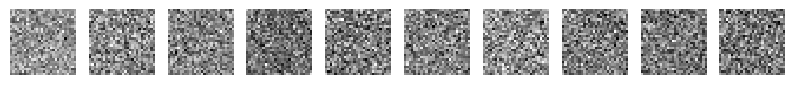

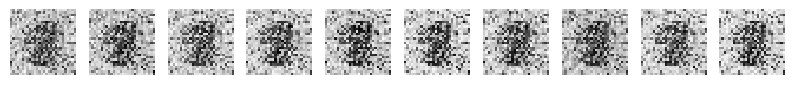

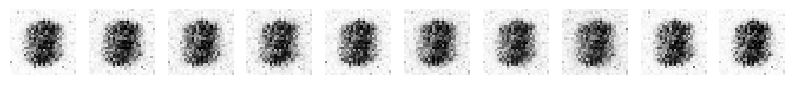

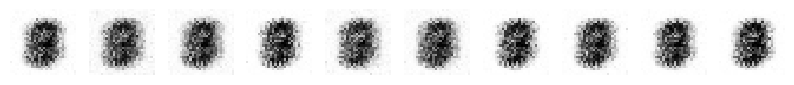

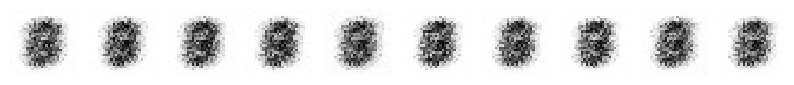

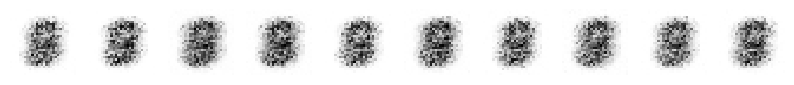

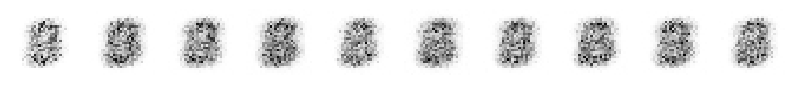

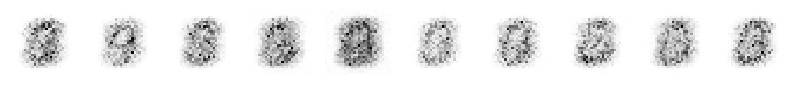

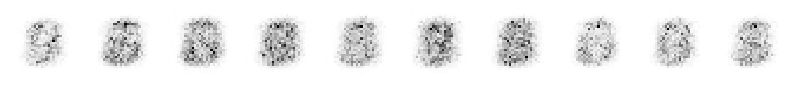

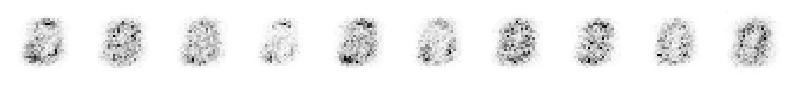

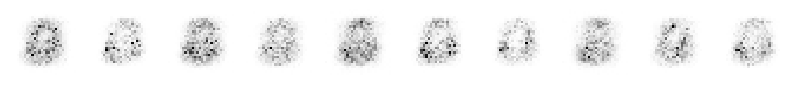

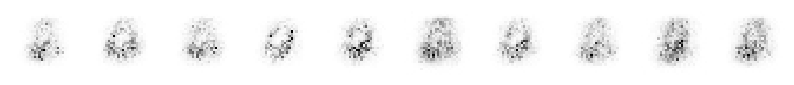

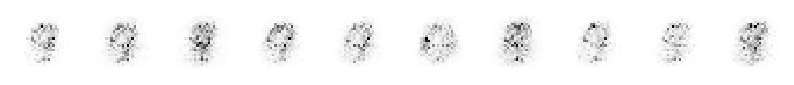

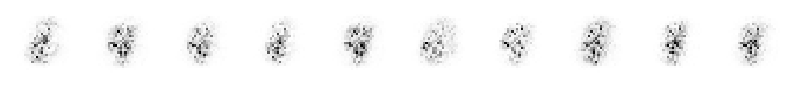

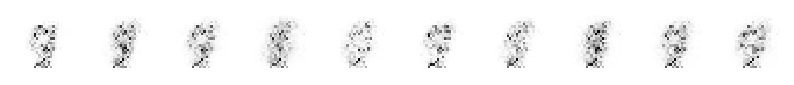

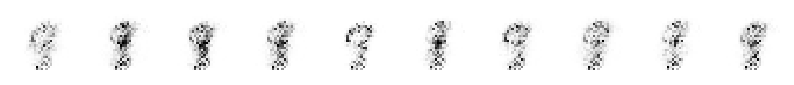

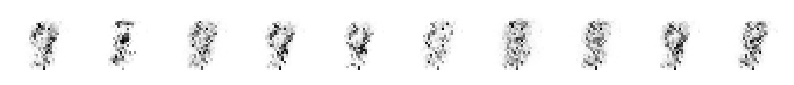

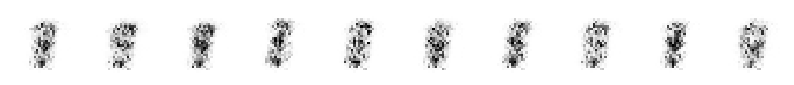

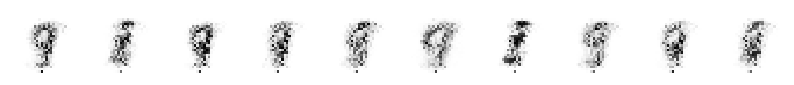

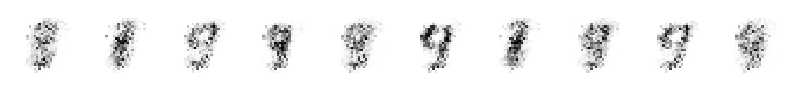

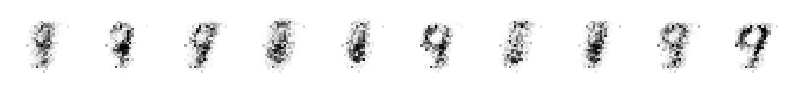

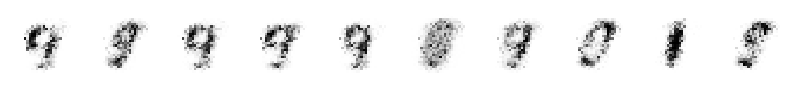

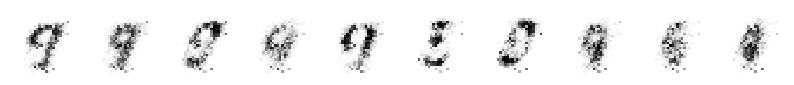

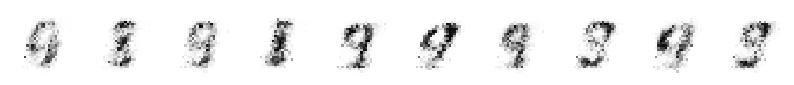

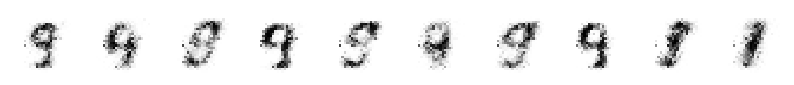

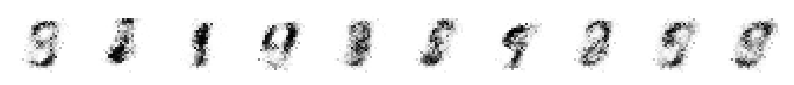

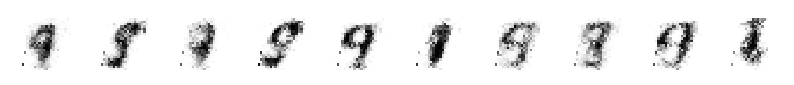

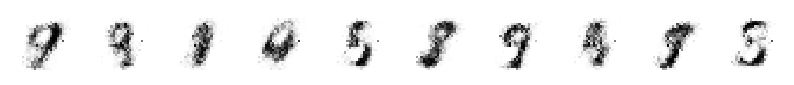

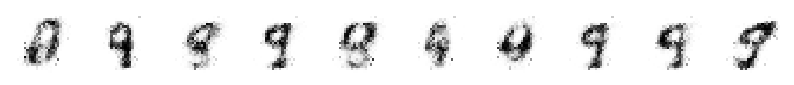

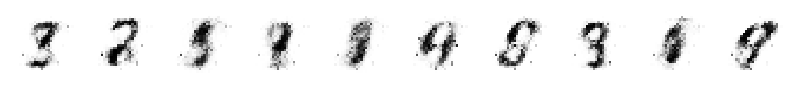

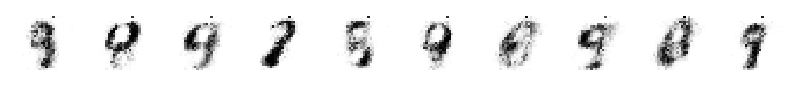

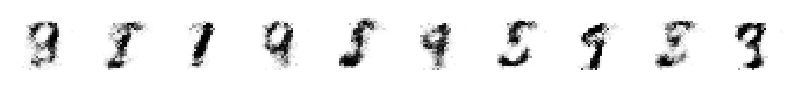

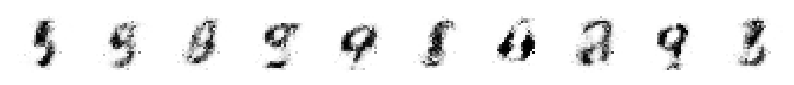

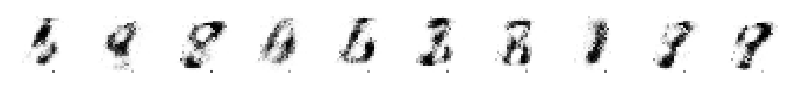

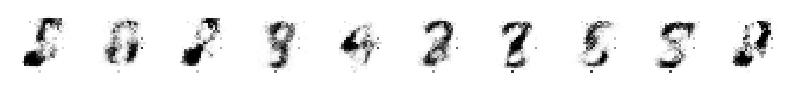

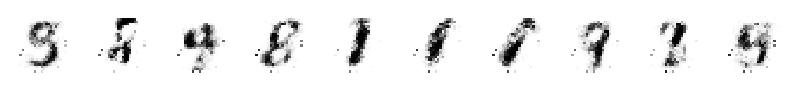

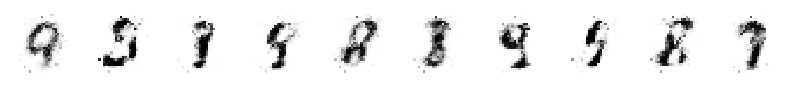

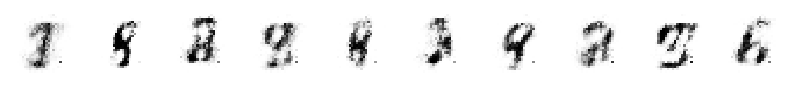

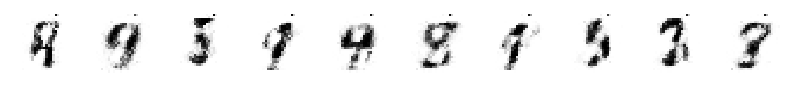

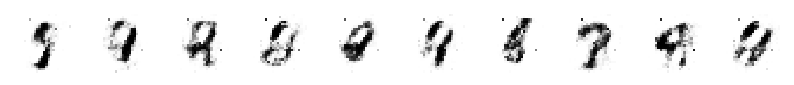

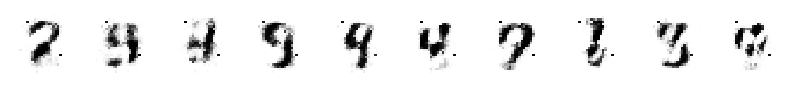

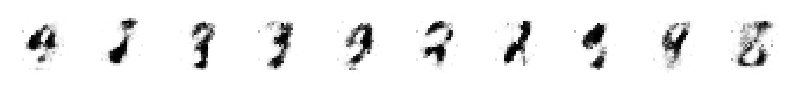

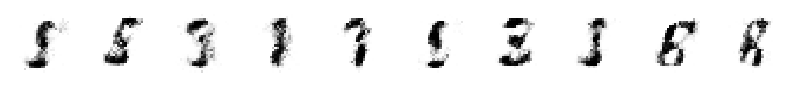

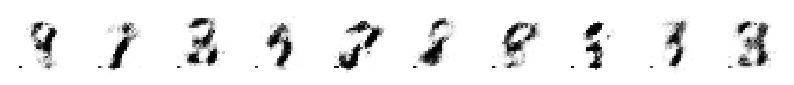

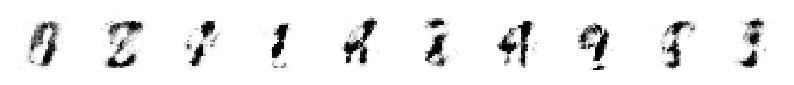

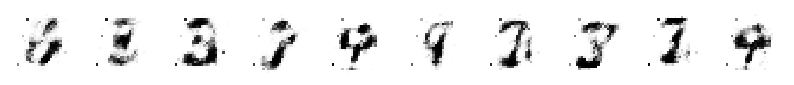

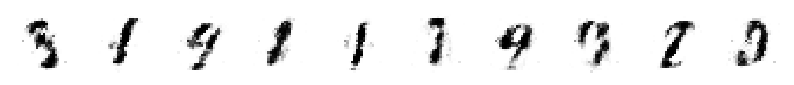

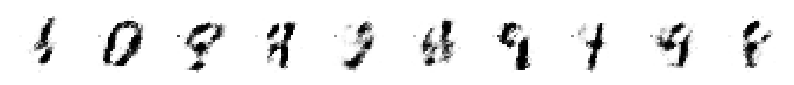

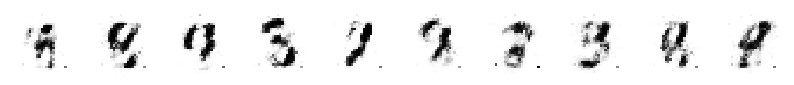

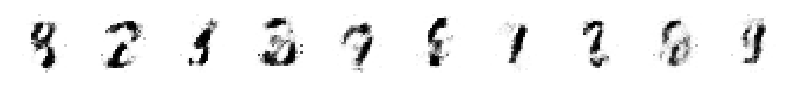

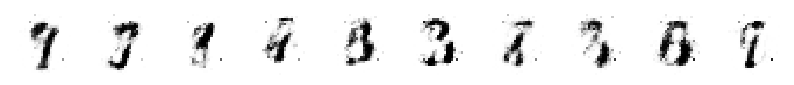

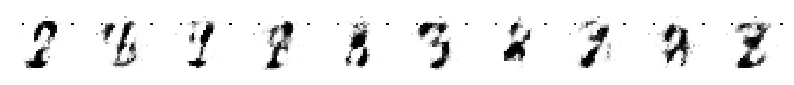

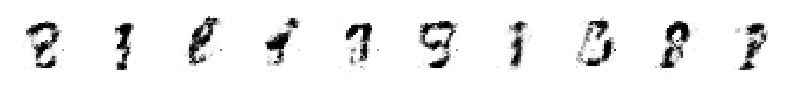

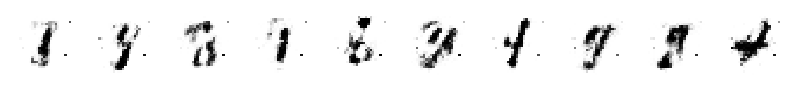

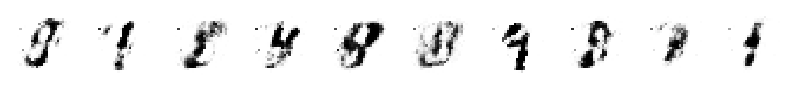

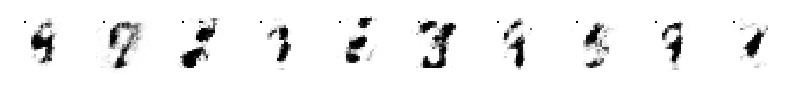

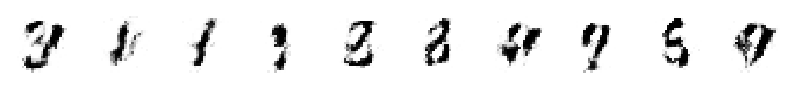

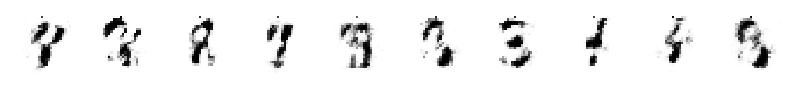

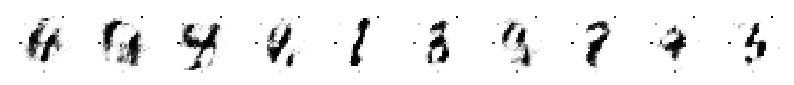

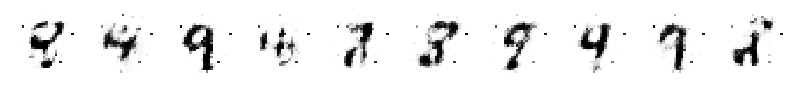

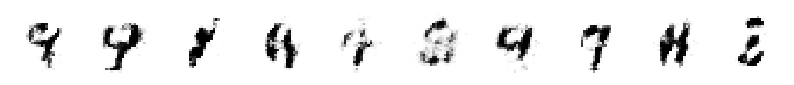

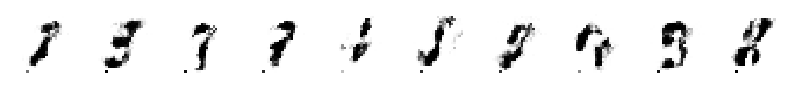

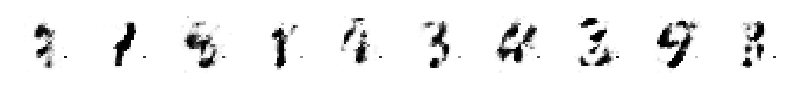

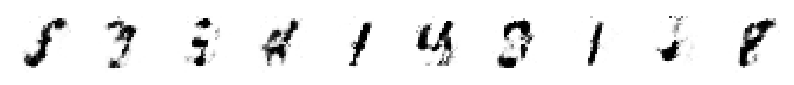

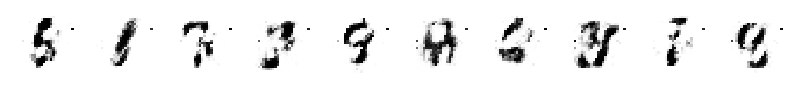

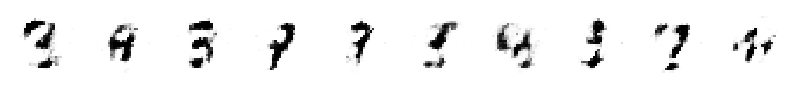

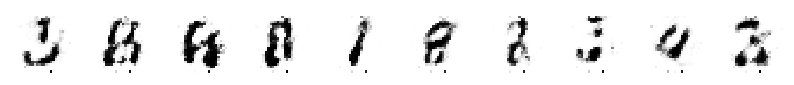

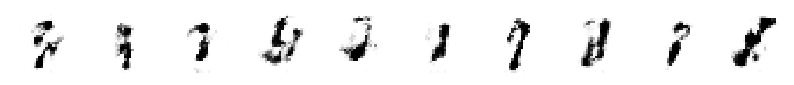

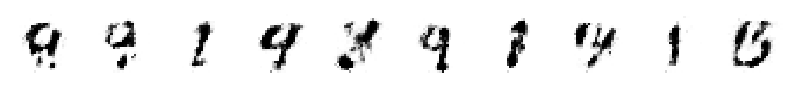

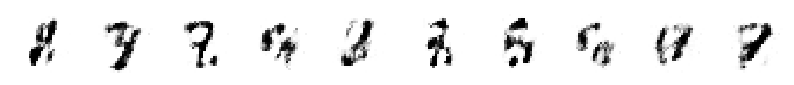

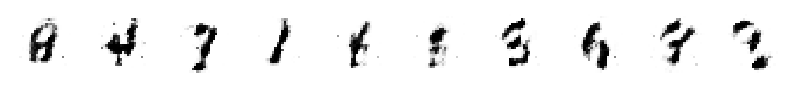

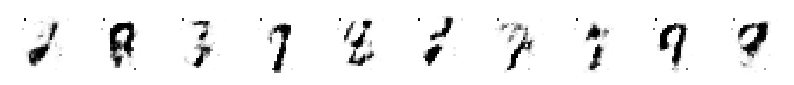

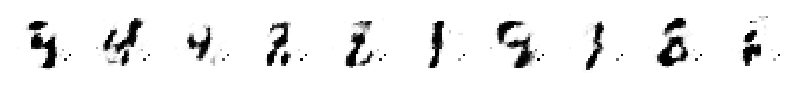

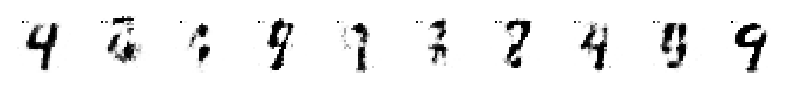

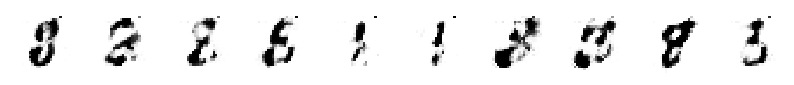

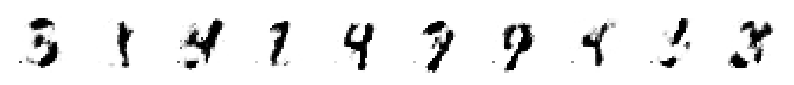

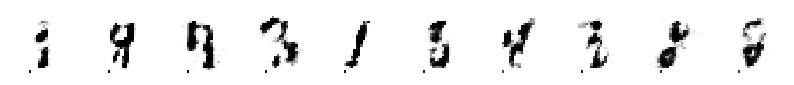

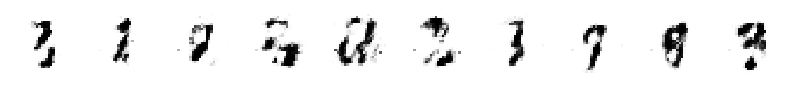

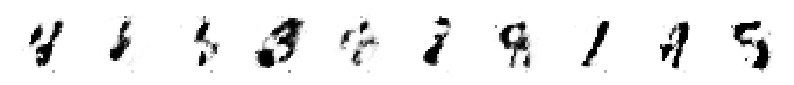

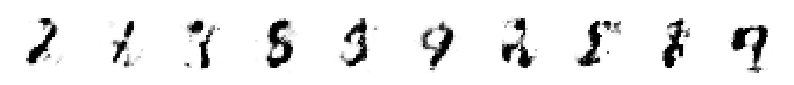

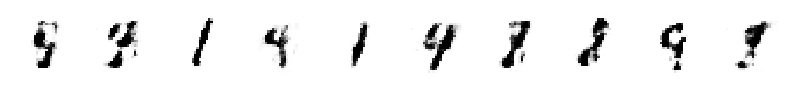

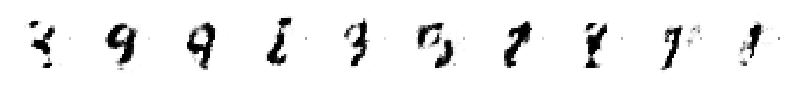

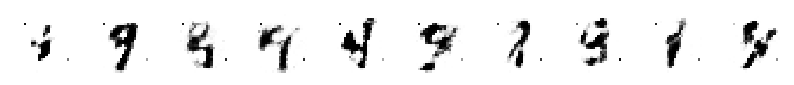

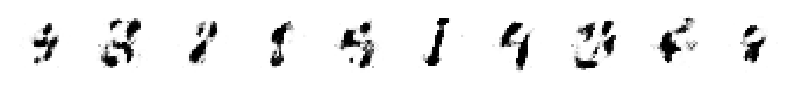

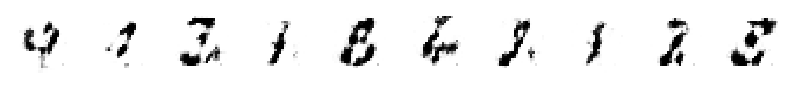

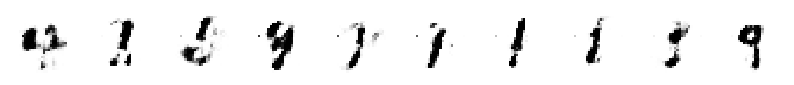

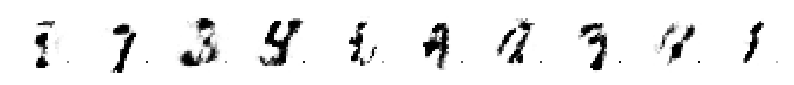

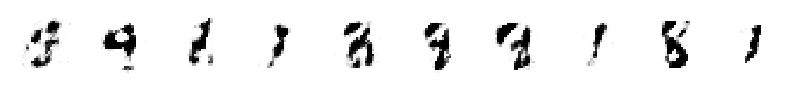

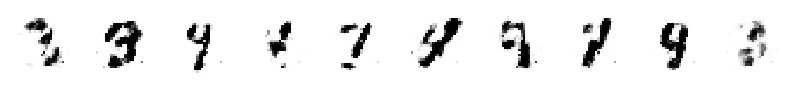

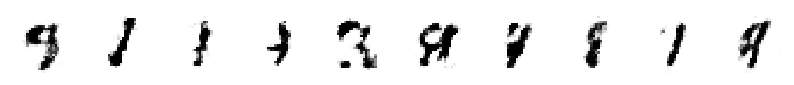

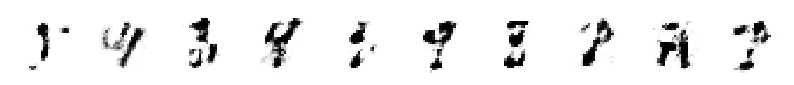

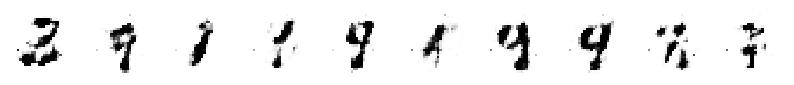

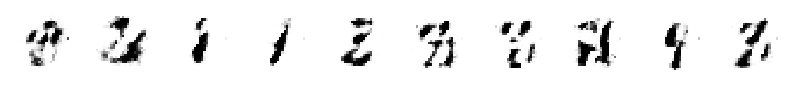

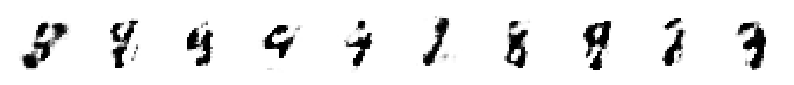

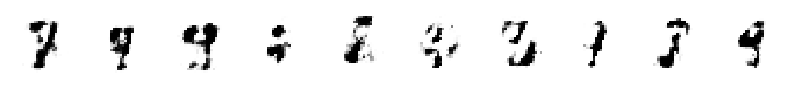

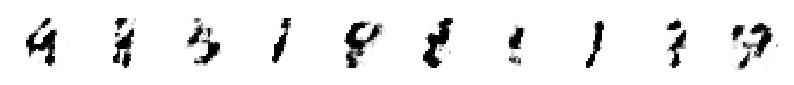

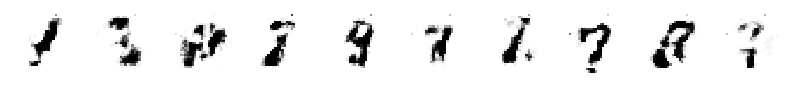

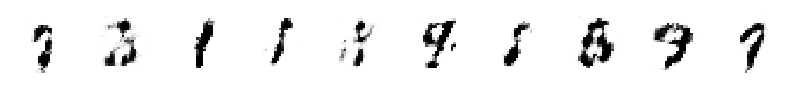

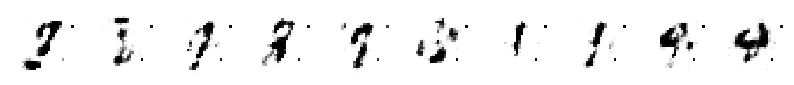

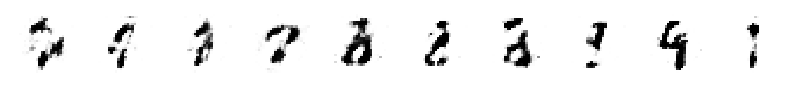

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 784)

# Generator model
generator = Sequential([
    Dense(128, input_dim=100, activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Compile GAN
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training loop
batch_size = 64
epochs = 10000

# Training loop
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)

    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]

    combined_images = np.concatenate([generated_images, real_images.reshape(batch_size, 28, 28)])
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)

    noise = np.random.normal(0, 1, (batch_size, 100))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(noise, misleading_targets)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, D Accuracy: {100*d_loss[1]}, G Loss: {a_loss}")

        # Generate and save some generated images
        gen_imgs = generator.predict(np.random.normal(0, 1, (10, 100)))
        plt.figure(figsize=(10, 1))
        for i in range(10):
            plt.subplot(1, 10, i + 1)
            plt.imshow(gen_imgs[i], interpolation='nearest', cmap='gray_r')
            plt.axis('off')
        plt.show

